In [1]:
mimic_iii_path = "/data/sr54687_data/datasets/physionet.org/files/mimiciii/1.4"
#SDoH_annot_path = "/data/sr54687_data/datasets/AnnotateGPT_MIMIC-III/"
SDoH_annot_path = "./"

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_3966365/3408537860.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#SDoH Annotations - convert pkl to csv
"""
import pickle as pkl

def unpickle_file(file):
  with open(f"{SDoH_annot_path}/{file}", 'rb') as f:
    data = pkl.load(f)
  data.to_csv(file[:-4] + '.csv', index=False)
  return data


files = ['ZeroShot_community_annotation.pkl', 'ZeroShot_economics_annotation.pkl', 'ZeroShot_tobacco_annotation.pkl']
community_df = unpickle_file('ZeroShot_community_annotation.pkl')
economics_df = unpickle_file('ZeroShot_economics_annotation.pkl')
tobacco_df = unpickle_file('ZeroShot_tobacco_annotation.pkl')
"""

'\nimport pickle as pkl\n\ndef unpickle_file(file):\n  with open(f"{SDoH_annot_path}/{file}", \'rb\') as f:\n    data = pkl.load(f)\n  data.to_csv(file[:-4] + \'.csv\', index=False)\n  return data\n\n\nfiles = [\'ZeroShot_community_annotation.pkl\', \'ZeroShot_economics_annotation.pkl\', \'ZeroShot_tobacco_annotation.pkl\']\ncommunity_df = unpickle_file(\'ZeroShot_community_annotation.pkl\')\neconomics_df = unpickle_file(\'ZeroShot_economics_annotation.pkl\')\ntobacco_df = unpickle_file(\'ZeroShot_tobacco_annotation.pkl\')\n'

In [3]:
#noteevents + SDoH file - join on row id, get subject_id to identify patient
NOTEEVENTS_DF = pd.read_csv(f"{mimic_iii_path}/NOTEEVENTS.csv.gz", low_memory=False)
print(NOTEEVENTS_DF.head())  

   ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0     174       22532  167853.0  2151-08-04       NaN       NaN   
1     175       13702  107527.0  2118-06-14       NaN       NaN   
2     176       13702  167118.0  2119-05-25       NaN       NaN   
3     177       13702  196489.0  2124-08-18       NaN       NaN   
4     178       26880  135453.0  2162-03-25       NaN       NaN   

            CATEGORY DESCRIPTION  CGID  ISERROR  \
0  Discharge summary      Report   NaN      NaN   
1  Discharge summary      Report   NaN      NaN   
2  Discharge summary      Report   NaN      NaN   
3  Discharge summary      Report   NaN      NaN   
4  Discharge summary      Report   NaN      NaN   

                                                TEXT  
0  Admission Date:  [**2151-7-16**]       Dischar...  
1  Admission Date:  [**2118-6-2**]       Discharg...  
2  Admission Date:  [**2119-5-4**]              D...  
3  Admission Date:  [**2124-7-21**]              ...  
4  Admission Da

In [5]:
NOTEEVENTS_DF.groupby(['SUBJECT_ID', 'HADM_ID']).count()

,,ROW_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
SUBJECT_ID,HADM_ID,,,,,,,,,
2,163353.0,2,2,2,2,2,2,2,0,2
3,145834.0,46,46,33,19,46,46,19,0,46
4,185777.0,14,14,11,4,14,14,4,0,14
5,178980.0,4,4,4,4,4,4,4,0,4
6,107064.0,20,20,18,7,20,20,7,0,20
...,...,...,...,...,...,...,...,...,...,...
99985,176670.0,134,134,130,130,134,134,130,0,134
99991,151118.0,36,36,35,30,36,36,30,0,36
99992,197084.0,7,7,4,0,7,7,0,0,7


In [6]:
#merge each SDoH file with NOTEEVENTS

# def merge_NOTEEVENTS_SDoH(x): 
#   x_df = pd.read_csv(f"{SDoH_annot_path}/ZeroShot_{x}_annotation.csv")
#   NOTEEVENTS_DF.merge(x_df, left_on="ROW_ID", right_on='ROW_ID', how='inner', suffixes=(None, f"_SDoH_{x}"))


SDoHs = ['community', 'economics', 'tobacco']
for x in SDoHs:
  # merge_NOTEEVENTS_SDoH(x) 
  x_df = pd.read_csv(f"{SDoH_annot_path}/ZeroShot_{x}_annotation.csv")
  NOTEEVENTS_DF = NOTEEVENTS_DF.merge(x_df, left_on="ROW_ID", right_on='ROW_ID', how='inner', suffixes=(None, f"_SDoH_{x}"))


In [7]:
#check percentage of true in community_df
x = 'community'
x_df = pd.read_csv(f"{SDoH_annot_path}/ZeroShot_{x}_annotation.csv")
print(len(x_df))

print(x_df.head())
print(x_df['sdoh_community-present'].sum())

44566
   ROW_ID                                               TEXT  \
0     175  SOCIAL HISTORY:  Lives with her husband, Dr. [...   
1     176  Social History:\nSocial History: The patient i...   
2     177  Social History:\nThe patient is married and wo...   
3     178  Social History:\nPatient recently discharged f...   
4     179  Social History:\nShe is married.  She had smok...   

   sdoh_community-present  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
27960


In [8]:
print(NOTEEVENTS_DF.columns)
print(len(NOTEEVENTS_DF))

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT',
       'TEXT_SDoH_community', 'sdoh_community-present', 'TEXT_SDoH_economics',
       'sdoh_economics', 'TEXT_SDoH_tobacco', 'sdoh_tobacco'],
      dtype='object')
44566


In [9]:
s_df = NOTEEVENTS_DF[['HADM_ID', 'sdoh_community-present', 'sdoh_economics', 'sdoh_tobacco']]

# y = s_df
y = s_df.groupby(['HADM_ID']).sdoh_economics.apply(lambda x: len(set(x))==1)
print(y.all())

False


In [10]:
# y = s_df[s_df.groupby(['HADM_ID']).transform('size')>1]
# y.head()
NOTEEVENTS_DF = NOTEEVENTS_DF.drop_duplicates(subset=['HADM_ID'], keep=False)
print(len(NOTEEVENTS_DF))
print(NOTEEVENTS_DF['HADM_ID'].is_unique)



42990
True


In [11]:
label_map = {'000': "C'E'T'", \
             '001': "C'E'T", \
             '010': "C'ET'", \
             '011': "C'ET", \
             '100': "CE'T'", \
             '101': "CE'T", \
             '110': "CET'", \
             '111': "CET", \
             }
# merged_NE_A.groupby(['sdoh_community-present', 'sdoh_economics', 'sdoh_tobacco'])['SDoH_Code'].transform(lambda x: label_map())
NOTEEVENTS_DF['SDoH_Code'] = NOTEEVENTS_DF.apply(lambda x: label_map[str(str(x['sdoh_community-present']) + str(x['sdoh_economics']) + str(x['sdoh_tobacco']))], axis=1)

In [12]:
x = NOTEEVENTS_DF[NOTEEVENTS_DF['sdoh_tobacco'] == 1]
x['TEXT_SDoH_tobacco'][13]

'Social History:\nLives alone in [**Location (un) 2268**], but has stayed with her sister recently\n[**1-1**] difficulty walking up stairs to her apt.  Remote smoking and\nEtOH history, pt unable to quantify. Denies IVDU.'

In [13]:
ADMISSIONS_DF = pd.read_csv(f"{mimic_iii_path}/ADMISSIONS.csv.gz")
print(ADMISSIONS_DF.head())

   ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0      21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1      22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2      23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3      24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4      25          25   129635  2160-11-02 02:06:00  2160-11-05 14:55:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   

          DISCHARGE_LOCATION INSURANCE LANGUAGE           RELIGION  \
0  DISC-TRAN CANCER/CHLDRN H   Private      NaN       UNOBTAINABLE   
1           HOME HEALTH CARE  Medicare      NaN           CA

In [14]:
#merge NOTEEVENTS and ADMISSIONS on HADM_ID
merged_NE_A = ADMISSIONS_DF.merge(NOTEEVENTS_DF, how="inner", on="HADM_ID", validate="one_to_one", suffixes=(None, "_NOTEEVENTS"))

In [15]:
print(len(merged_NE_A))
print(merged_NE_A.head())

42990
   ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0      21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1      22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2      23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3      24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4      25          25   129635  2160-11-02 02:06:00  2160-11-05 14:55:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   

          DISCHARGE_LOCATION INSURANCE  ... CGID ISERROR  \
0  DISC-TRAN CANCER/CHLDRN H   Private  ...  NaN     NaN   
1           HOME HEALTH CARE  Medicare  ...  NaN     NaN   
2           HO

In [16]:
# ADMISSIONS_DF = pd.read_csv(f"{mimic_iii_path}/ADMISSIONS.csv.gz")
# print(ADMISSIONS_DF.head())

merged_NE_A['ADMITTIME'] = pd.to_datetime(merged_NE_A['ADMITTIME'],
               format='%Y-%m-%d %H:%M:%S')
merged_NE_A['DISCHTIME'] = pd.to_datetime(merged_NE_A['DISCHTIME'],
               format='%Y-%m-%d %H:%M:%S')
merged_NE_A['DEATHTIME'] = pd.to_datetime(merged_NE_A['DEATHTIME'],
               format='%Y-%m-%d %H:%M:%S')

#compute length of stay
# merged_NE_A['LEN_STAY'] = (merged_NE_A['DISCHTIME'] - merged_NE_A['ADMITTIME']).apply(lambda x: x.days)
merged_NE_A['LEN_STAY'] = (merged_NE_A['DISCHTIME'] - merged_NE_A['ADMITTIME']).dt.total_seconds()/(24*60*60)
#remove negative len of stays
merged_NE_A = merged_NE_A.loc[merged_NE_A.LEN_STAY >= 0]


merged_NE_A = merged_NE_A.sort_values(['SUBJECT_ID', 'ADMITTIME'])
merged_NE_A = merged_NE_A.reset_index(drop=True)

# merged_NE_A['NEXT_ADMITTIME'] = 

merged_NE_A['NEXT_ADMITTIME'] = merged_NE_A.groupby('SUBJECT_ID').ADMITTIME.shift(-1)
merged_NE_A['NEXT_ADMISSION_TYPE'] = merged_NE_A.groupby('SUBJECT_ID').ADMISSION_TYPE.shift(-1)

#filter planned("ELECTIVE") readmissions
rows = merged_NE_A['NEXT_ADMISSION_TYPE'] == "ELECTIVE"
merged_NE_A.loc[rows, 'NEXT_ADMITTIME'] = pd.NaT
merged_NE_A.loc[rows, 'NEXT_ADMISSION_TYPE'] = np.NaN

#backfill
merged_NE_A = merged_NE_A.sort_values(['SUBJECT_ID', 'ADMITTIME'])
merged_NE_A[['NEXT_ADMITTIME', 'NEXT_ADMISSION_TYPE']] = merged_NE_A.groupby(['SUBJECT_ID'])[['NEXT_ADMITTIME', 'NEXT_ADMISSION_TYPE']].fillna(method='bfill')

#no. of days until readmission
merged_NE_A['DAYS_NEXT_ADMIT'] = (merged_NE_A['NEXT_ADMITTIME'] - merged_NE_A['DISCHTIME']).dt.total_seconds()/(24*60*60)

/tmp/ipykernel_1920134/2126316430.py:33: FutureWarning: DataFrameGroupBy.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_NE_A[['NEXT_ADMITTIME', 'NEXT_ADMISSION_TYPE']] = merged_NE_A.groupby(['SUBJECT_ID'])[['NEXT_ADMITTIME', 'NEXT_ADMISSION_TYPE']].fillna(method='bfill')
/tmp/ipykernel_1920134/2126316430.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_NE_A[['NEXT_ADMITTIME', 'NEXT_ADMISSION_TYPE']] = merged_NE_A.groupby(['SUBJECT_ID'])[['NEXT_ADMITTIME', 'NEXT_ADMISSION_TYPE']].fillna(method='bfill')


In [17]:
print(len(merged_NE_A))
# print(merged_NE_A.head())
print(merged_NE_A.columns)

42958
Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID_NOTEEVENTS',
       'SUBJECT_ID_NOTEEVENTS', 'CHARTDATE', 'CHARTTIME', 'STORETIME',
       'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT',
       'TEXT_SDoH_community', 'sdoh_community-present', 'TEXT_SDoH_economics',
       'sdoh_economics', 'TEXT_SDoH_tobacco', 'sdoh_tobacco', 'SDoH_Code',
       'LEN_STAY', 'NEXT_ADMITTIME', 'NEXT_ADMISSION_TYPE', 'DAYS_NEXT_ADMIT'],
      dtype='object')


In [112]:
# merged_NE_A.groupby(['sdoh_community-present', 'sdoh_economics', 'sdoh_tobacco']).count()
merged_NE_A.groupby(['SDoH_Code']).count()/42958

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,TEXT_SDoH_community,sdoh_community-present,TEXT_SDoH_economics,sdoh_economics,TEXT_SDoH_tobacco,sdoh_tobacco,LEN_STAY,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE,DAYS_NEXT_ADMIT
SDoH_Code,,,,,,,,,,,,,,,,,,,,,
C'E'T,0.119419,0.119419,0.119419,0.119419,0.119419,0.010545,0.119419,0.119419,0.119419,0.119419,...,0.119419,0.119419,0.119419,0.119419,0.119419,0.119419,0.119419,0.023791,0.023791,0.023791
C'E'T',0.145794,0.145794,0.145794,0.145794,0.145794,0.016644,0.145794,0.145794,0.145794,0.145794,...,0.145794,0.145794,0.145794,0.145794,0.145794,0.145794,0.145794,0.022999,0.022999,0.022999
C'ET,0.059151,0.059151,0.059151,0.059151,0.059151,0.005028,0.059151,0.059151,0.059151,0.059151,...,0.059151,0.059151,0.059151,0.059151,0.059151,0.059151,0.059151,0.014084,0.014084,0.014084
C'ET',0.047116,0.047116,0.047116,0.047116,0.047116,0.004958,0.047116,0.047116,0.047116,0.047116,...,0.047116,0.047116,0.047116,0.047116,0.047116,0.047116,0.047116,0.009637,0.009637,0.009637
CE'T,0.162089,0.162089,0.162089,0.162089,0.162089,0.015527,0.162089,0.162089,0.162089,0.162089,...,0.162089,0.162089,0.162089,0.162089,0.162089,0.162089,0.162089,0.037153,0.037153,0.037153
CE'T',0.200033,0.200033,0.200033,0.200033,0.200033,0.022953,0.200033,0.200033,0.200033,0.200033,...,0.200033,0.200033,0.200033,0.200033,0.200033,0.200033,0.200033,0.037641,0.037641,0.037641
CET,0.150496,0.150496,0.150496,0.150496,0.150496,0.014852,0.150496,0.150496,0.150496,0.150496,...,0.150496,0.150496,0.150496,0.150496,0.150496,0.150496,0.150496,0.038712,0.038712,0.038712
CET',0.115904,0.115904,0.115904,0.115904,0.115904,0.011779,0.115904,0.115904,0.115904,0.115904,...,0.115904,0.115904,0.115904,0.115904,0.115904,0.115904,0.115904,0.027282,0.027282,0.027282


SDoH_Code  C'E'T  C'E'T'  C'ET  C'ET'  CE'T  CE'T'   CET  CET'
ADMITTIME                                                     
2100        27.0    33.0   9.0    3.0  26.0   45.0  26.0  23.0
2101        45.0    55.0  17.0   16.0  68.0   82.0  49.0  46.0
2102        44.0    56.0  20.0   14.0  76.0   86.0  55.0  45.0
2103        64.0    60.0  12.0   21.0  58.0   76.0  73.0  63.0
2104        49.0    58.0  17.0   18.0  65.0   66.0  48.0  51.0
...          ...     ...   ...    ...   ...    ...   ...   ...
2206         3.0     1.0   4.0    NaN   6.0    2.0   6.0   2.0
2207         NaN     NaN   NaN    NaN   1.0    NaN   4.0   1.0
2208         1.0     NaN   NaN    NaN   2.0    NaN   2.0   NaN
2209         1.0     1.0   NaN    NaN   NaN    NaN   1.0   NaN
2210         NaN     NaN   NaN    NaN   NaN    1.0   NaN   NaN

[111 rows x 8 columns]


<Axes: xlabel='ADMITTIME'>

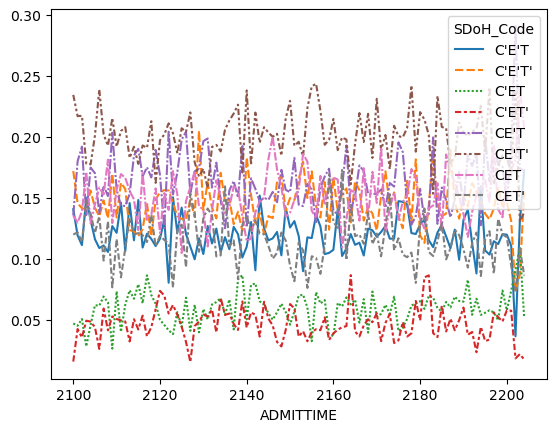

In [111]:
y = merged_NE_A.groupby(by=[merged_NE_A.ADMITTIME.map(lambda x: x.year), 'SDoH_Code'])['ROW_ID'].count().reset_index(name='COUNT')
y = y.pivot(index='ADMITTIME', columns='SDoH_Code', values='COUNT')
print(y)
y = y.div(y.sum(axis=1), axis=0)
# y = y.fillna(0)
y = y.dropna()

sns.lineplot(data=y)
# print(y)
# SDoH_years = y.to_numpy()
# print(SDoH_years.shape)
# SDoH_years = np.nan_to_num(SDoH_years, nan=0.0, copy=False)


In [ ]:
# label_map = {'000': "C'E'T'", \
#              '001': "C'E'T", \
#              '010': "C'ET'", \
#              '011': "C'ET", \
#              '100': "CE'T'", \
#              '101': "CE'T", \
#              '110': "CET'", \
#              '111': "CET", \
#              }
# # merged_NE_A.groupby(['sdoh_community-present', 'sdoh_economics', 'sdoh_tobacco'])['SDoH_Code'].transform(lambda x: label_map())
# merged_NE_A['SDoH_Code'] = merged_NE_A.apply(lambda x: label_map[str(str(x['sdoh_community-present_SDoH_community']) + str(x['sdoh_economics_SDoH_economics']) + str(x['sdoh_tobacco_SDoH_tobacco']))], axis=1)

<Axes: xlabel='SDoH_Code', ylabel='DAYS_NEXT_ADMIT'>

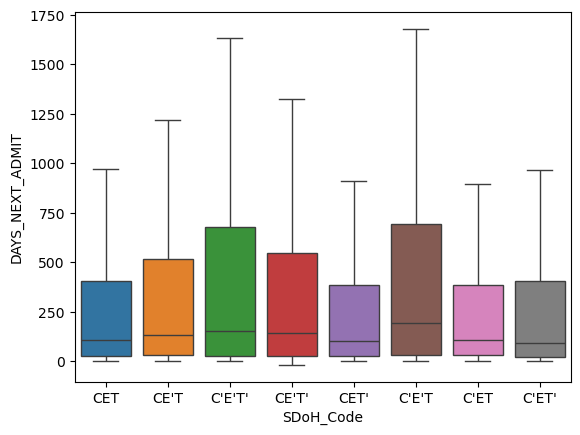

In [19]:
sns.boxplot(data=merged_NE_A, x='SDoH_Code', y='DAYS_NEXT_ADMIT', showfliers=False, hue='SDoH_Code')


<Axes: xlabel='SDoH_Code', ylabel='LEN_STAY'>

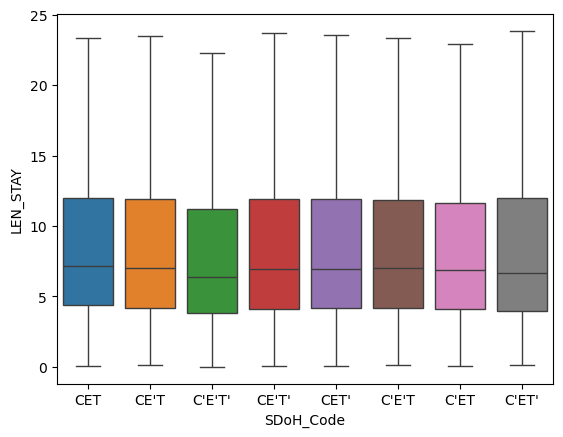

In [20]:
sns.boxplot(data=merged_NE_A, x='SDoH_Code', y='LEN_STAY', showfliers=False, hue='SDoH_Code')


array([<Axes: ylabel="C'E'T">, <Axes: ylabel="C'E'T'">,
       <Axes: ylabel="C'ET">, <Axes: ylabel="C'ET'">,
       <Axes: ylabel="CE'T">, <Axes: ylabel="CE'T'">,
       <Axes: ylabel='CET'>, <Axes: ylabel="CET'">], dtype=object)

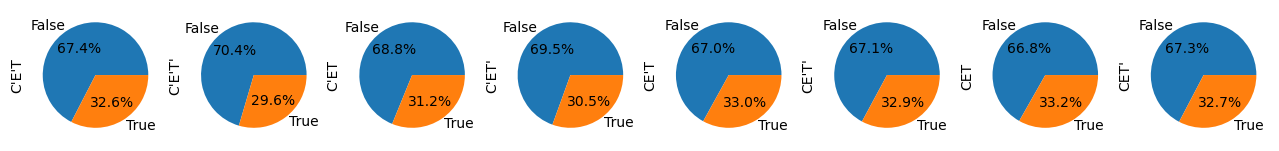

In [21]:
#LEN_STAY

temp_df = merged_NE_A
temp_df['LEN_STAY_bin'] = temp_df['LEN_STAY'] >= temp_df['LEN_STAY'].mean()
# temp_df.groupby(['SDoH_Code', 'LEN_STAY_bin']).count()['ROW_ID'].plot.pie(subplots=False)
# temp_df = 
df = pd.DataFrame({'Count': temp_df.groupby(['SDoH_Code', 'LEN_STAY_bin']).size()}).reset_index()#.plot.pie(subplots=True)
# temp_df.plot(kind='pie', y='Count')
# df = pd.DataFrame({'SDoH':[8,3,4,2], 'var2':[1,3,4,1]}, index=LEN_STAY_bin )
df.pivot(index='LEN_STAY_bin', columns='SDoH_Code', values='Count').plot(kind='pie', subplots=True,  autopct='%1.1f%%', figsize=(16,28), legend=False)

In [22]:
print(NOTEEVENTS_DF.columns)

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT',
       'TEXT_SDoH_community', 'sdoh_community-present', 'TEXT_SDoH_economics',
       'sdoh_economics', 'TEXT_SDoH_tobacco', 'sdoh_tobacco', 'SDoH_Code'],
      dtype='object')


In [123]:
DIAGNOSES_ICD = pd.read_csv(f"{mimic_iii_path}/DIAGNOSES_ICD.csv.gz")
print(DIAGNOSES_ICD.head())

   ROW_ID  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE
0    1297         109   172335      1.0     40301
1    1298         109   172335      2.0       486
2    1299         109   172335      3.0     58281
3    1300         109   172335      4.0      5855
4    1301         109   172335      5.0      4254


In [124]:
NOTEEVENTS_DF['HADM_ID'].is_unique

ICD9_CODE = 4011

# DIAGNOSES_ICD_code = DIAGNOSES_ICD[DIAGNOSES_ICD['ICD9_CODE']==str(ICD9_CODE)]
# DIAGNOSES_ICD['ICD9_CODE'] = DIAGNOSES_ICD['ICD9_CODE'].astype(str)
DIAGNOSES_ICD_code = DIAGNOSES_ICD[DIAGNOSES_ICD['ICD9_CODE'].str.startswith(str(ICD9_CODE))]
DIAGNOSES_ICD_code 
print(len(DIAGNOSES_ICD_code))
print(DIAGNOSES_ICD_code.head())


454
       ROW_ID  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE
12810   12600        1084   194111      9.0      4011
18310   31021        2759   107939     19.0      4011
36669   51283        4618   125578     12.0      4011
42441   26786        2378   173442     13.0      4011
45664   25711        2298   170681      7.0      4011


In [129]:
print(DIAGNOSES_ICD_code['HADM_ID'].is_unique)
# ICD9_CODE_HADM_IDs = DIAGNOSES_ICD_code['HADM_ID'].astype('str').to_list()
DIAGNOSES_ICD_code = DIAGNOSES_ICD_code.drop_duplicates(subset=['HADM_ID'], keep="first")
print(DIAGNOSES_ICD_code['HADM_ID'].is_unique)
ICD9_CODE_HADM_IDs = DIAGNOSES_ICD_code['HADM_ID'].to_list()

temp_NE = NOTEEVENTS_DF
temp_NE['ICD_CODE_bin'] = np.where(temp_NE['HADM_ID'].isin(ICD9_CODE_HADM_IDs), 1, 0)

True
True


In [130]:
print(DIAGNOSES_ICD_code['HADM_ID'].is_unique)
print(NOTEEVENTS_DF['HADM_ID'].is_unique)
print(len(DIAGNOSES_ICD_code))
print(len(NOTEEVENTS_DF))

True
True
454
42990


In [131]:
#inner merge on NOTEEVENTS
merged_NE_ICD9 = NOTEEVENTS_DF.merge(DIAGNOSES_ICD_code, how="inner", on="HADM_ID", validate="one_to_one", suffixes=(None, "_DIAGNOSES_ICD_Code"))
# merged_NE_ICD9['SDoH_Code'] = merged_NE_ICD9.apply(lambda x: label_map[str(str(x['sdoh_community-present_SDoH_community']) + str(x['sdoh_economics_SDoH_economics']) + str(x['sdoh_tobacco_SDoH_tobacco']))], axis=1)
print(len(merged_NE_ICD9))
print(merged_NE_ICD9.columns)


441
Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT',
       'TEXT_SDoH_community', 'sdoh_community-present', 'TEXT_SDoH_economics',
       'sdoh_economics', 'TEXT_SDoH_tobacco', 'sdoh_tobacco', 'SDoH_Code',
       'ICD_CODE_bin', 'ROW_ID_DIAGNOSES_ICD_Code',
       'SUBJECT_ID_DIAGNOSES_ICD_Code', 'SEQ_NUM', 'ICD9_CODE'],
      dtype='object')


In [134]:
# sns.boxplot(data=merged_NE_ICD9, x='SDoH_Code', y='DAYS_NEXT_ADMIT', showfliers=False, hue='SDoH_Code')
# merged_NE_ICD9.groupby(['SDoH_Code']).size()
temp_NE = merged_NE_ICD9
print(temp_NE.groupby(['SDoH_Code', 'ICD_CODE_bin']).size())
df = pd.DataFrame({'Count': temp_NE.groupby(['SDoH_Code', 'ICD_CODE_bin']).size()}).reset_index()#.plot.pie(subplots=True)

# temp_df.plot(kind='pie', y='Count')
# df = pd.DataFrame({'SDoH':[8,3,4,2], 'var2':[1,3,4,1]}, index=LEN_STAY_bin )
# df.pivot(index='ICD_CODE_bin', columns='SDoH_Code', values='Count').plot(kind='pie', subplots=True,  autopct='%1.1f%%', figsize=(15,28), legend=False)

SDoH_Code  ICD_CODE_bin
C'E'T      1               39
C'E'T'     1               60
C'ET       1               21
C'ET'      1               30
CE'T       1               68
CE'T'      1               90
CET        1               78
CET'       1               55
dtype: int64
  SDoH_Code  ICD_CODE_bin  Count
0     C'E'T             1     39
1    C'E'T'             1     60
2      C'ET             1     21
3     C'ET'             1     30
4      CE'T             1     68
5     CE'T'             1     90
6       CET             1     78
7      CET'             1     55


In [ ]:
#identify SDoH for each patient
PATIENTS_SDoH_DF = NOTEEVENTS_DF[['SUBJECT_ID', 'sdoh_community-present', 'sdoh_economics', 'sdoh_tobacco']]
print(PATIENTS_SDoH_DF.head())
print(len(PATIENTS_SDoH_DF))

In [ ]:
PATIENTS_SDoH_DF_1 = PATIENTS_SDoH_DF.drop_duplicates(subset=['SUBJECT_ID'])
print(len(PATIENTS_SDoH_DF_1))

PATIENTS_SDoH_DF_2 = PATIENTS_SDoH_DF.drop_duplicates()
print(len(PATIENTS_SDoH_DF_2))

In [ ]:
# PATIENTS_SDoH_DF[PATIENTS_SDoH_DF.groupby('SUBJECT_ID').transform('size') > 1] 
SDoH_DUPLICATES = NOTEEVENTS_DF[NOTEEVENTS_DF.groupby('SUBJECT_ID').transform('size') > 1]

In [ ]:
SDoH_DUPLICATES[SDoH_DUPLICATES.groupby('SUBJECT_ID').transform('size') > 1]

In [ ]:
id = 56174
x_df = pd.read_csv(f"{SDoH_annot_path}/ZeroShot_tobacco_annotation.csv")
print(SDoH_DUPLICATES[SDoH_DUPLICATES['SUBJECT_ID']==id]['ROW_ID'])

In [ ]:
r = NOTEEVENTS_DF[NOTEEVENTS_DF['ROW_ID']==177]
print(str(r['TEXT']))

In [ ]:
texts = NOTEEVENTS_DF['TEXT']
print(texts[1])

In [ ]:
ADMISSIONS_DF = pd.read_csv(f"{mimic_iii_path}/ADMISSIONS.csv.gz")
print(ADMISSIONS_DF.head())

In [ ]:
#remove admissions where the patient died
print(len(ADMISSIONS_DF))
ADMISSIONS_DF = ADMISSIONS_DF.loc[ADMISSIONS_DF.DEATHTIME.isna()]
print(len(ADMISSIONS_DF))

In [ ]:
#calculate len of stay in days
admit_times = pd.to_datetime(ADMISSIONS_DF['ADMITTIME'], format='%Y-%m-%d %H:%M:%S')
disch_times = pd.to_datetime(ADMISSIONS_DF['DISCHTIME'], format='%Y-%m-%d %H:%M:%S')
ADMISSIONS_DF['LEN_STAY'] = (disch_times - admit_times).apply(lambda x: x.days)

#remove negative len of stays
ADMISSIONS_DF = ADMISSIONS_DF.loc[ADMISSIONS_DF.LEN_STAY >= 0]
# ADMISSIONS_DF['LEN_STAY'] = ADMISSIONS_DF['LEN_STAY'].apply(lambda x: x.days)



In [ ]:
"""
Ordering patients by Admit Time
"""
ADMISSIONS_DF['ADMITTIME_numeric'] = pd.to_datetime(ADMISSIONS_DF['ADMITTIME'], format='%Y-%m-%d %H:%M:%S')
sorted_ADMISSIONS_DF = ADMISSIONS_DF.sort_values(by='ADMITTIME_numeric')

In [92]:
print(len(merged_NE_A['LEN_STAY']))

42958


<Axes: >

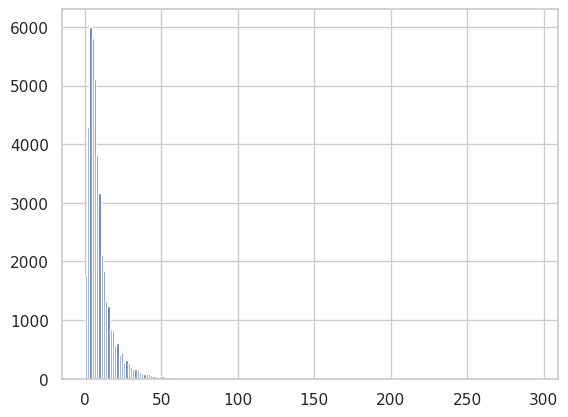

In [ ]:
print(pd.to_datetime(ADMISSIONS_DF['ADMITTIME'],
               format='%Y-%m-%d %H:%M:%S'))

print(admit_times[0], disch_times[0], disch_times[0] - admit_times[0])

In [ ]:
# los = disch_times[0] - admit_times[0]
# print(type(los))
# print(los.days)
type(len_stay)


Calculating Readmissions: https://towardsdatascience.com/introduction-to-clinical-natural-language-processing-predicting-hospital-readmission-with-1736d52bc709

In [ ]:
ADMISSIONS_DF = pd.read_csv(f"{mimic_iii_path}/ADMISSIONS.csv.gz")
print(ADMISSIONS_DF.head())

# ADMISSIONS_DF['ADMITTIME'] = pd.to_datetime(ADMISSIONS_DF['ADMITTIME'],
#                format='%Y-%m-%d %H:%M:%S')
# ADMISSIONS_DF['DISCHTIME'] = pd.to_datetime(ADMISSIONS_DF['DISCHTIME'],
#                format='%Y-%m-%d %H:%M:%S')
# ADMISSIONS_DF['DEATHTIME'] = pd.to_datetime(ADMISSIONS_DF['DEATHTIME'],
#                format='%Y-%m-%d %H:%M:%S')

# #compute length of stay
# # ADMISSIONS_DF['LEN_STAY'] = (ADMISSIONS_DF['DISCHTIME'] - ADMISSIONS_DF['ADMITTIME']).apply(lambda x: x.days)
# ADMISSIONS_DF['LEN_STAY'] = (ADMISSIONS_DF['DISCHTIME'] - ADMISSIONS_DF['ADMITTIME']).dt.total_seconds()/(24*60*60)
# #remove negative len of stays
# ADMISSIONS_DF = ADMISSIONS_DF.loc[ADMISSIONS_DF.LEN_STAY >= 0]


# ADMISSIONS_DF = ADMISSIONS_DF.sort_values(['SUBJECT_ID', 'ADMITTIME'])
# ADMISSIONS_DF = ADMISSIONS_DF.reset_index(drop=True)

# # ADMISSIONS_DF['NEXT_ADMITTIME'] = 

# ADMISSIONS_DF['NEXT_ADMITTIME'] = ADMISSIONS_DF.groupby('SUBJECT_ID').ADMITTIME.shift(-1)
# ADMISSIONS_DF['NEXT_ADMISSION_TYPE'] = ADMISSIONS_DF.groupby('SUBJECT_ID').ADMISSION_TYPE.shift(-1)

# #filter planned("ELECTIVE") readmissions
# rows = ADMISSIONS_DF['NEXT_ADMISSION_TYPE'] == "ELECTIVE"
# ADMISSIONS_DF.loc[rows, 'NEXT_ADMITTIME'] = pd.NaT
# ADMISSIONS_DF.loc[rows, 'NEXT_ADMISSION_TYPE'] = np.NaN

# #backfill
# ADMISSIONS_DF = ADMISSIONS_DF.sort_values(['SUBJECT_ID', 'ADMITTIME'])
# ADMISSIONS_DF[['NEXT_ADMITTIME', 'NEXT_ADMISSION_TYPE']] = ADMISSIONS_DF.groupby(['SUBJECT_ID'])[['NEXT_ADMITTIME', 'NEXT_ADMISSION_TYPE']].fillna(method='bfill')

# #no. of days until readmission
# ADMISSIONS_DF['DAYS_NEXT_ADMIT'] = (ADMISSIONS_DF['NEXT_ADMITTIME'] - ADMISSIONS_DF['DISCHTIME']).dt.total_seconds()/(24*60*60)

In [ ]:
ADMISSIONS_DF[ADMISSIONS_DF['SUBJECT_ID'] == 13702]

In [ ]:
#merging NOTEEVENTS.csv and ADMISSIONS.CSV
# print(NOTEEVENTS_DF.head())
print(NOTEEVENTS_DF['HADM_ID'].is_unique)

print(ADMISSIONS_DF['HADM_ID'].is_unique)

In [ ]:
print(len(NOTEEVENTS_DF))

In [ ]:
x_df = pd.read_csv(f"{SDoH_annot_path}/ZeroShot_community_annotation.csv")
print(len(x_df))
print(x_df['ROW_ID'].is_unique)

In [ ]:
len(ADMISSIONS_DF)